In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acea-water-prediction/Aquifer_Doganella.csv
/kaggle/input/acea-water-prediction/Aquifer_Auser.csv
/kaggle/input/acea-water-prediction/Water_Spring_Amiata.csv
/kaggle/input/acea-water-prediction/datasets_description.ods
/kaggle/input/acea-water-prediction/Lake_Bilancino.csv
/kaggle/input/acea-water-prediction/datasets_description.xlsx
/kaggle/input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv
/kaggle/input/acea-water-prediction/Aquifer_Luco.csv
/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv
/kaggle/input/acea-water-prediction/Water_Spring_Lupa.csv
/kaggle/input/acea-water-prediction/River_Arno.csv


In [2]:
#Dowloading the data
df = pd.read_csv('../input/acea-water-prediction/Lake_Bilancino.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [3]:
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [4]:
df['Rainfall_Mangona'].unique()

array([  nan,   0. ,   0.8,   5.8,   1.6,   2.6,   0.2,  13. ,  11.4,
        49.6,  40.2,   2.2,   6.8,   1.8,   0.6,   8.2,   1.4,  11.6,
        21.4,  26. ,  27.4,  29.2,   3.4,  14.8,   2.4,  13.2,   4.6,
        13.8,   7.4,   4.4,  14.4,   0.4,  11. ,   8. ,   1. ,  12.6,
         3.6,  19.4,   4.2,  10.6,   3.8,  46.6,  28.4,   8.8,  23.2,
         7. ,   7.2,   1.2,  12. ,  16. ,   5.6,  20.2,   5.2,  23.4,
        28.8,  29.6,   7.6,   6. ,  22.2,  46.2,   5. ,  21.2,  11.8,
         4.8,   5.4,  24.8,  16.2,  44.4,  12.4,   2. ,   9. ,  39.2,
        15.6,  33.2,   8.6,  23.6,  21.8,  10.2,  18. ,  48.6,  15.4,
         6.4,   9.2,  17.2,  11.2,  22.4,  26.2,  14.6,   9.6,  24.4,
        42.4,  20.6,  36.4,  41.8,  47.4,  16.4,  24. ,  14. ,   9.8,
        20. ,  18.2,  30.4,  21.6,  23.8,   3.2,  15.8,  29.8,  25.6,
         6.6,   4. ,   3. ,  15. ,  30.8,   6.2,  19.8,   2.8,  10.4,
       108.6,  20.8,  37. ,  59.4,  14.2,  10.8,  32.6,  34.4,  17.6,
        16.8,  70.6,

In [5]:
df.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


# Data visualization

array([[<AxesSubplot:title={'center':'Rainfall_S_Piero'}>,
        <AxesSubplot:title={'center':'Rainfall_Mangona'}>,
        <AxesSubplot:title={'center':'Rainfall_S_Agata'}>],
       [<AxesSubplot:title={'center':'Rainfall_Cavallina'}>,
        <AxesSubplot:title={'center':'Rainfall_Le_Croci'}>,
        <AxesSubplot:title={'center':'Temperature_Le_Croci'}>],
       [<AxesSubplot:title={'center':'Lake_Level'}>,
        <AxesSubplot:title={'center':'Flow_Rate'}>, <AxesSubplot:>]],
      dtype=object)

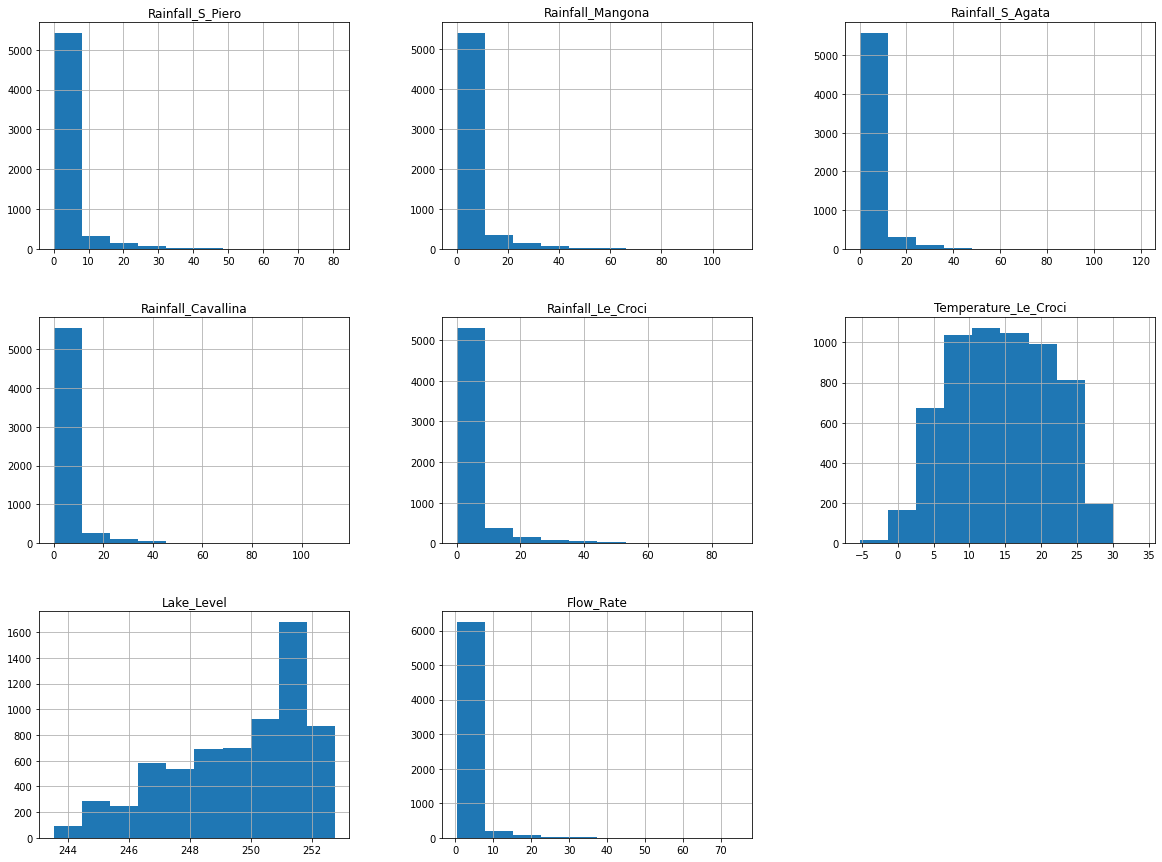

In [6]:
# plotting histograms of different features
df.hist(figsize=(20,15))

<AxesSubplot:>

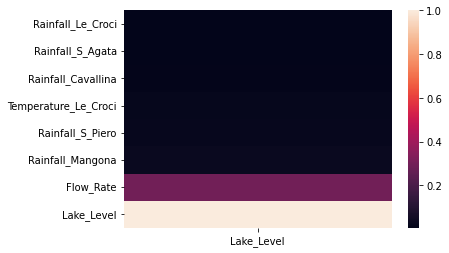

In [7]:
sns.heatmap(df.corr('spearman').abs()[['Lake_Level']].sort_values('Lake_Level'))

In [8]:
df['Date']= pd.to_datetime(df['Date'])
df['Year']= df['Date'].dt.year
df['Month']=df['Date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6603 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6026 non-null   float64       
 2   Rainfall_Mangona      6026 non-null   float64       
 3   Rainfall_S_Agata      6026 non-null   float64       
 4   Rainfall_Cavallina    6026 non-null   float64       
 5   Rainfall_Le_Croci     6026 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6603 non-null   float64       
 8   Flow_Rate             6582 non-null   float64       
 9   Year                  6603 non-null   int64         
 10  Month                 6603 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 567.6 KB


<AxesSubplot:xlabel='Year', ylabel='Temperature_Le_Croci'>

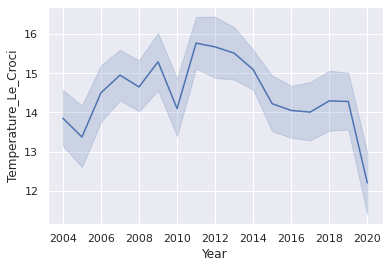

In [9]:
# plotting the Temperature Le Croci over the years
sns.set_theme(style="darkgrid")

sns.lineplot(x="Year", y="Temperature_Le_Croci",data=df)

<AxesSubplot:xlabel='Year', ylabel='Lake_Level'>

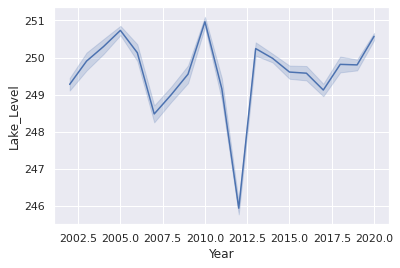

In [10]:
#plotting the lake level over the years
sns.set_theme(style="darkgrid")

sns.lineplot(x="Year", y="Lake_Level",data=df)

<AxesSubplot:xlabel='Year', ylabel='Flow_Rate'>

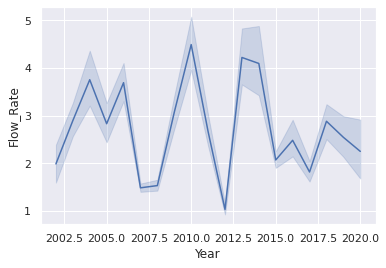

In [11]:
# plotting the flow rate over the years

sns.set_theme(style="darkgrid")
sns.lineplot(x='Year', y='Flow_Rate',data=df)

In [12]:
df_rain = df.groupby(['Year'])[['Rainfall_S_Piero','Rainfall_Mangona','Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean().reset_index()
df_rain.head(3)

,Year,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci
0,2002,NaN,NaN,NaN,NaN,NaN
1,2003,NaN,NaN,NaN,NaN,NaN
2,2004,2.387432,3.387432,2.214208,2.915301,3.053005


<Figure size 1440x1080 with 0 Axes>

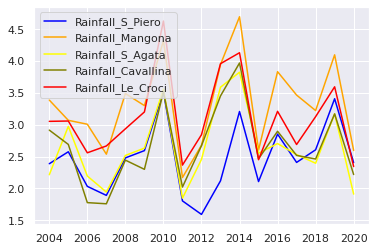

<Figure size 1440x1080 with 0 Axes>

In [13]:
# plotting the rain pattern over the years
import matplotlib.pyplot as plt
plt.plot('Year', 'Rainfall_S_Piero', data = df_rain, color='blue' )
plt.plot('Year', 'Rainfall_Mangona', data = df_rain, color='orange' )
plt.plot('Year', 'Rainfall_S_Agata', data = df_rain, color='yellow' )
plt.plot('Year', 'Rainfall_Cavallina', data = df_rain, color='olive' )
plt.plot('Year', 'Rainfall_Le_Croci', data = df_rain, color='red' )
plt.legend()
plt.figure(figsize=(20,15))

In [14]:
df_rain = df.groupby(['Month'])[['Rainfall_S_Piero','Rainfall_Mangona','Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean().reset_index()
df_rain.head(3)

,Month,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci
0,1,3.200384,4.638004,3.177351,3.612668,4.254127
1,2,2.679158,3.578526,2.832421,2.949474,3.670737
2,3,2.137428,2.924376,2.381190,2.514012,2.829175


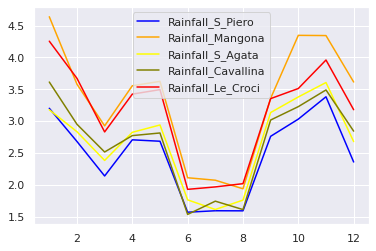

In [15]:
# plotting the rain pattern over the months
plt.plot('Month', 'Rainfall_S_Piero', data = df_rain, color='blue' )
plt.plot('Month', 'Rainfall_Mangona', data = df_rain, color='orange' )
plt.plot('Month', 'Rainfall_S_Agata', data = df_rain, color='yellow' )
plt.plot('Month', 'Rainfall_Cavallina', data = df_rain, color='olive' )
plt.plot('Month', 'Rainfall_Le_Croci', data = df_rain, color='red' )
plt.legend()


# Preparing the data for modeling

In [16]:
df['Rainfall_net']=df[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].sum(axis = 1)
df['Rainfall_mean']=df[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean(axis = 1)
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month,Rainfall_net,Rainfall_mean
0,2002-03-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,3,0.0,NaN
1,2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,4,0.0,NaN
2,2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,5,0.0,NaN
3,2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,6,0.0,NaN
4,2002-07-06,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31,2002,7,0.0,NaN


# Linear Regression for Modeling


In [17]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [18]:

train = df[df['Year'].isin([2017,2018,2019,2020])]
test = df[df['Year'].isin([2017])]

x_train = train[["Year","Month","Flow_Rate","Rainfall_mean","Rainfall_net"]]
y_train = train[["Lake_Level"]]

x_test = test[["Year","Month","Flow_Rate","Rainfall_mean", "Rainfall_net"]]
y_test = test[["Lake_Level"]]

In [19]:
lnrg= LinearRegression(normalize=True)

In [20]:
x_train.shape

(1277, 5)

In [21]:
x_test.shape

(365, 5)

In [22]:
lnrg.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [23]:
y_pred= lnrg.predict(x_test)

In [24]:
rs = r2_score(y_test, y_pred)
rs

0.17031055077444268

# Random forest for Modeling


In [25]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
rs = r2_score(y_test, y_pred)
rs

0.8467178464668017